<a href="https://colab.research.google.com/github/Ahmed-Sohail2000/Predictive-Analytics-for-Bone-Health-Project/blob/main/Predictive_Analytics_for_Bone_Health_Project%F0%9F%94%AE%F0%9F%A6%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Analytics for Bone Health Project 🔮🦴

## Project Scope 🔎

The aim of this project is to develop 3 deep learning models and compare which one performs the best to classify whether or not the bone health is healthy based on the features available in the dataset.

## Project Objectives 🎯

The project objectives is to:

1. Get the dataset
2. Perform EDA (Exploratory Data Analysis)
3. Preprocess the data
4. Implement 3 Deep Learning Models on our preprocessed data
5. Evaluate each of the models and get the F1-Score, Precision, Recall, ROC Curve, AUC, etc.
6. Fine-tune and improve the models performance (if neccessary).

## Project Resources 📚

TBC


## 1.0 Getting the dataset

Before getting the dataset, it is important to import the neccessary libraries.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install -U scikit-learn
import sklearn

Now that we have imported the necessary libraries, lets import the dataset from the github repository dataset folder.

In [2]:
# initiate the dataset link from github
url = 'https://raw.githubusercontent.com/Ahmed-Sohail2000/Predictive-Analytics-for-Bone-Health-Project/refs/heads/main/Dataset/synthetic_bone_quality_dataset_100001_rows_updated.csv'

# use the pd.read_csv() to read the csv data
data = pd.read_csv('https://raw.githubusercontent.com/Ahmed-Sohail2000/Predictive-Analytics-for-Bone-Health-Project/refs/heads/main/Dataset/synthetic_bone_quality_dataset_100001_rows_updated.csv')

# make a dataframe using pd.DataFrame
data_df = pd.DataFrame(data = data)

# get the first 5 row of the data
data_df.head()

,Cortical_Thickness,Future_Cortical_Thickness,Trabecular_Thickness,Future_Trabecular_Thickness,Bone_Density,Future_Bone_Density,Bone_Mineral_Density,Future_Bone_Mineral_Density,Health_Status
0,2.580915,2.451869,0.129765,0.123276,0.999632,0.949650,0.778792,0.739852,0
1,2.053111,1.950455,0.234051,0.222349,1.460571,1.387543,1.107627,1.052246,0
2,2.479638,2.355656,0.160924,0.152878,1.285595,1.221315,0.647377,0.615008,0
3,2.095290,1.990525,0.183279,0.174115,1.178927,1.119980,0.753439,0.715767,0
4,2.973794,2.825104,0.243434,0.231262,0.824815,0.783574,0.426686,0.405351,0


## 2.0 Perform EDA (Exploratory Data Analysis) 🧪

In [3]:
# get the info our dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Cortical_Thickness           100001 non-null  float64
 1   Future_Cortical_Thickness    100001 non-null  float64
 2   Trabecular_Thickness         100001 non-null  float64
 3   Future_Trabecular_Thickness  100001 non-null  float64
 4   Bone_Density                 100001 non-null  float64
 5   Future_Bone_Density          100001 non-null  float64
 6   Bone_Mineral_Density         100001 non-null  float64
 7   Future_Bone_Mineral_Density  100001 non-null  float64
 8   Health_Status                100001 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


In [4]:
# Lets see our data stats
data_df.describe()

,Cortical_Thickness,Future_Cortical_Thickness,Trabecular_Thickness,Future_Trabecular_Thickness,Bone_Density,Future_Bone_Density,Bone_Mineral_Density,Future_Bone_Mineral_Density,Health_Status
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,2.503980,2.378781,0.250185,0.237675,1.099591,1.044612,0.799188,0.759228,0.103169
std,0.866073,0.822769,0.086644,0.082312,0.230672,0.219138,0.230900,0.219355,0.304181
min,1.000014,0.950014,0.100001,0.095001,0.700004,0.665004,0.400002,0.380002,0.000000
25%,1.752165,1.664557,0.175076,0.166322,0.899637,0.854655,0.599221,0.569260,0.000000
50%,2.505575,2.380296,0.250340,0.237823,1.100508,1.045483,0.798373,0.758454,0.000000
75%,3.251211,3.088650,0.325132,0.308875,1.299609,1.234628,0.999544,0.949567,0.000000
max,3.999968,3.799970,0.399994,0.379994,1.499994,1.424994,1.199996,1.139996,1.000000


As shown above, the total number of data points in our dataframe is `100,000`. And the `health status` represents the `label` of the data whilst the remaining parameters are the features of the dataframe.

Now lets check if we have any missing values in our dataset?

In [5]:
# check missing values
data_df.isnull().sum()    # is null is checking if there are any missing values and the .sum() gets the total count of each parameter

,0
Cortical_Thickness,0
Future_Cortical_Thickness,0
Trabecular_Thickness,0
Future_Trabecular_Thickness,0
Bone_Density,0
Future_Bone_Density,0
Bone_Mineral_Density,0
Future_Bone_Mineral_Density,0
Health_Status,0


Awesome, we don't have any missing values in our dataframe. This will be helpful to apply deep learning models into our data and get the most accurate representation of our data structure.

Let's check for duplicate/unique values?

In [6]:
# check for duplicate/unique values
data_df.duplicated().sum()

0

In [7]:
data_df.nunique()

,0
Cortical_Thickness,100000
Future_Cortical_Thickness,100000
Trabecular_Thickness,99982
Future_Trabecular_Thickness,99982
Bone_Density,99997
Future_Bone_Density,99995
Bone_Mineral_Density,99996
Future_Bone_Mineral_Density,99997
Health_Status,2


**Note:** Hmm, it looks like our features and its respective future features are identical in the number and unique values it has. Based on this information, it is better to drop all future features since it will add redunduncy to our training performance for our deep learning models.

  * Key tip: Always check your duplicate, unique, and missing values in your dataframe for any relationship or differences in your dataset for better insights and future model training.

In [8]:
# get the type of data
data_df.dtypes

,0
Cortical_Thickness,float64
Future_Cortical_Thickness,float64
Trabecular_Thickness,float64
Future_Trabecular_Thickness,float64
Bone_Density,float64
Future_Bone_Density,float64
Bone_Mineral_Density,float64
Future_Bone_Mineral_Density,float64
Health_Status,int64


Another awesome thing to see. We want our data to be numerical values as deep learning learn better in numbers rather in texts (categorical).

Now here's the fun part of this project: VISUALIZE, VISUALIZE, VISUALIZE

### 2.1 Visualizing our Data 📊

Let's try to get a correlation of our data first before breaking it down into chunks.

**Resource**
1. Correlation Heatmap - https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/


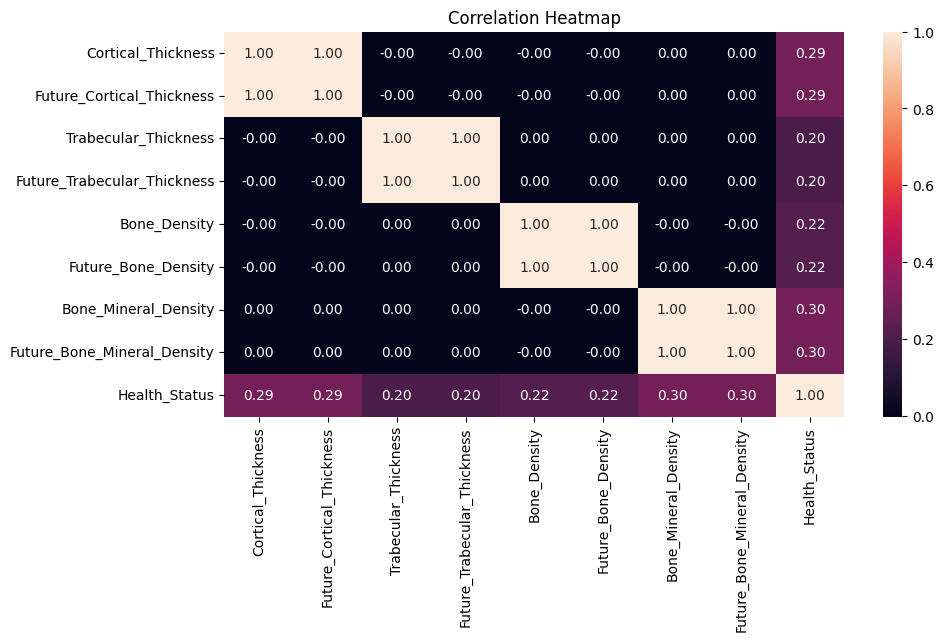

In [9]:
# inititate the correlation function
correlation = data_df.corr();

plt.figure(figsize = (10, 5));
sns.heatmap(correlation, annot = True, fmt  = '.2f');
plt.title('Correlation Heatmap');

As shown above, you can see that the features (cortical thickness, trabecular thickness, bone density, bone mineral density) and its respective future features have a correlation value of 1.0. This means that the relationship between those 2 features amongst each other are linear and have a similar idential value with no unique values. So in our preprocessing section, we will need to remove the future features as it will not be useful for our model training and performance.

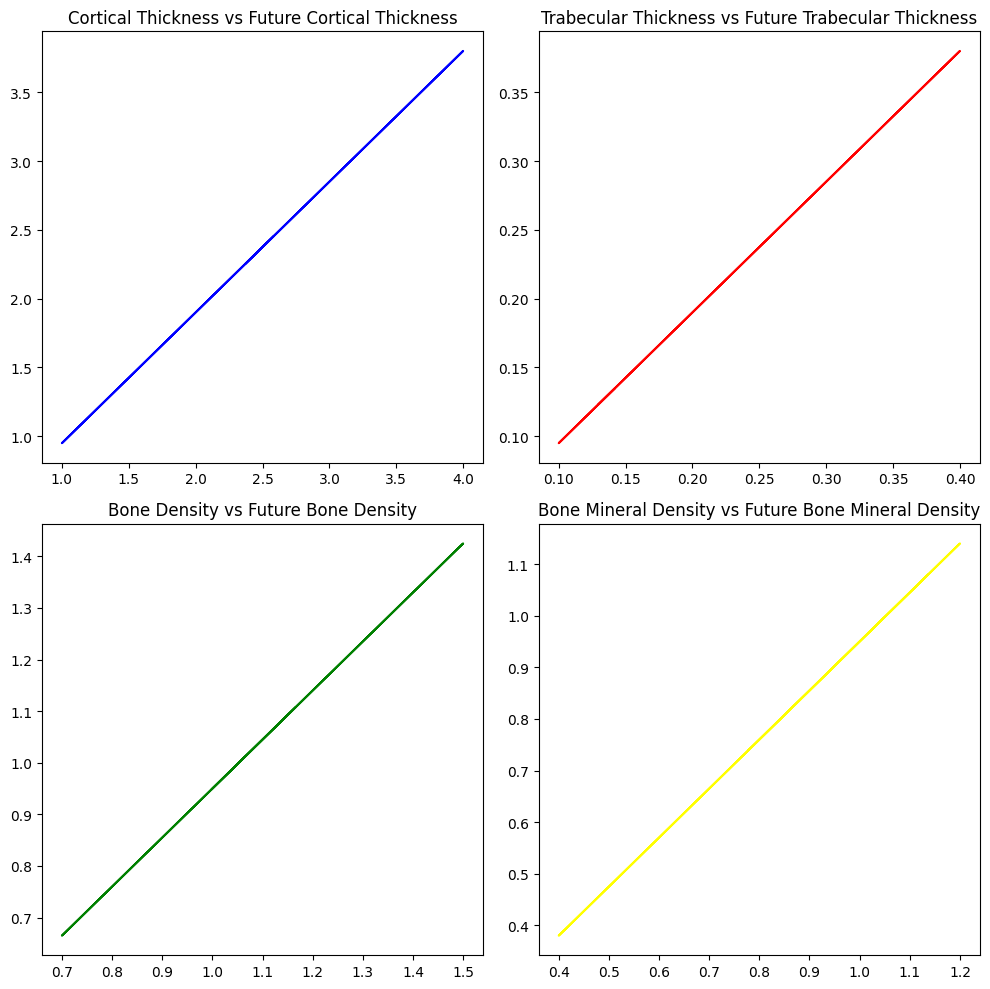

In [10]:
# Let's plot the features with its respective future features for more insight.
fig, ax = plt.subplots(2, 2, figsize = (10, 10));

# create plot 1
ax[0, 0].plot(data_df['Cortical_Thickness'], data_df['Future_Cortical_Thickness'], color = 'blue');
ax[0, 0].set_title('Cortical Thickness vs Future Cortical Thickness');

# create plot 2
ax[0, 1].plot(data_df['Trabecular_Thickness'], data_df['Future_Trabecular_Thickness'], color = 'red');
ax[0, 1].set_title('Trabecular Thickness vs Future Trabecular Thickness');


# create plot 3
ax[1, 0].plot(data_df['Bone_Density'], data_df['Future_Bone_Density'], color = 'green');
ax[1, 0].set_title('Bone Density vs Future Bone Density');


# Create plot 4
ax[1, 1].plot(data_df['Bone_Mineral_Density'], data_df['Future_Bone_Mineral_Density'], color = 'yellow');
ax[1, 1].set_title('Bone Mineral Density vs Future Bone Mineral Density');

plt.tight_layout()

As proven earlier, the line graphs show a linearity of each features having a idential value and similarity. Now let's get the graphs of each features without the future respective features.

**Resources**

1. Figures, subplots - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html
2. Scatter plots - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter

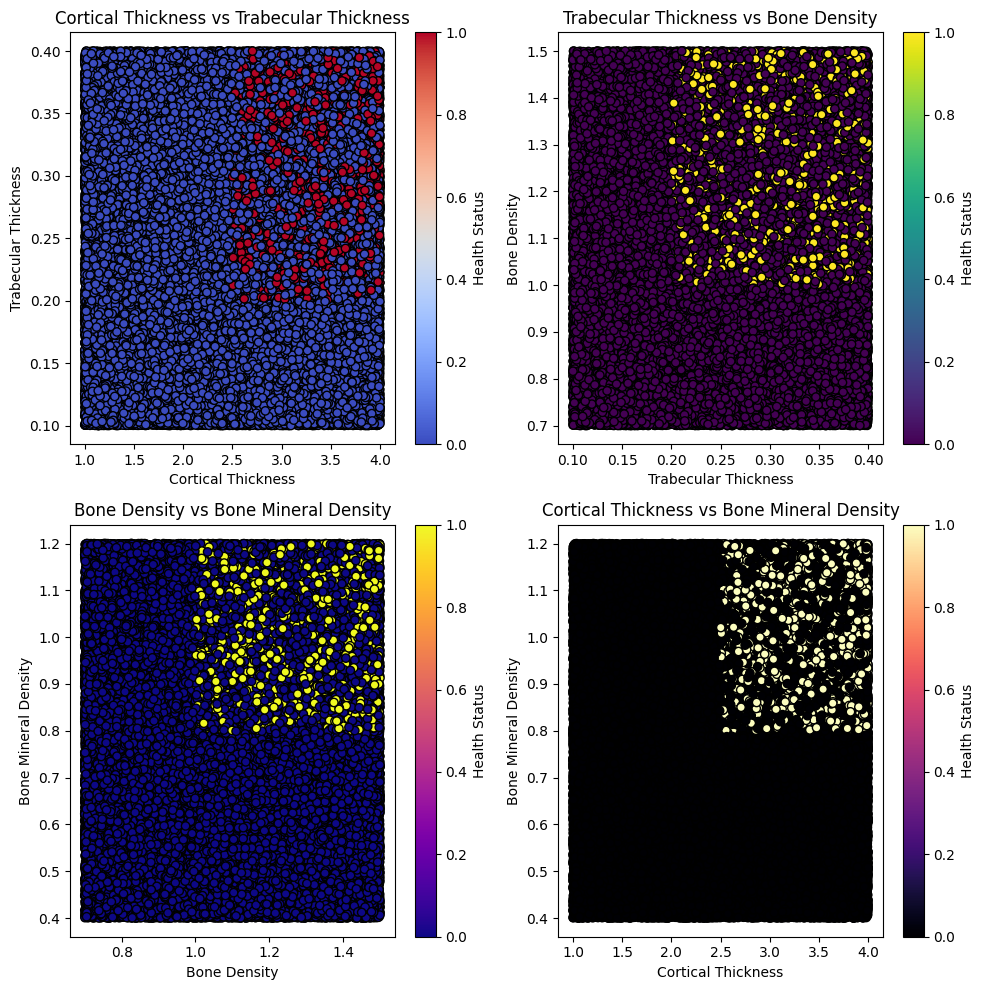

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10));

# Scatter Plot 1
scatter_1 = ax[0, 0].scatter(data_df['Cortical_Thickness'], data_df['Trabecular_Thickness'], c=data_df['Health_Status'], cmap='coolwarm', edgecolor='black')
ax[0, 0].set_title('Cortical Thickness vs Trabecular Thickness')
ax[0, 0].set_xlabel('Cortical Thickness')
ax[0, 0].set_ylabel('Trabecular Thickness')
cbar = fig.colorbar(scatter_1, ax=ax[0, 0])
cbar.set_label('Health Status')

# Scatter Plot 2 (Different Color Map)
scatter_2 = ax[0, 1].scatter(data_df['Trabecular_Thickness'], data_df['Bone_Density'], c=data_df['Health_Status'], cmap='viridis', edgecolor='black')
ax[0, 1].set_title('Trabecular Thickness vs Bone Density')
ax[0, 1].set_xlabel('Trabecular Thickness')
ax[0, 1].set_ylabel('Bone Density')
cbar = fig.colorbar(scatter_2, ax=ax[0, 1])
cbar.set_label('Health Status')

# Scatter Plot 3 (Another Different Color Map)
scatter_3 = ax[1, 0].scatter(data_df['Bone_Density'], data_df['Bone_Mineral_Density'], c=data_df['Health_Status'], cmap='plasma', edgecolor='black')
ax[1, 0].set_title('Bone Density vs Bone Mineral Density')
ax[1, 0].set_xlabel('Bone Density')
ax[1, 0].set_ylabel('Bone Mineral Density')
cbar = fig.colorbar(scatter_3, ax=ax[1, 0])
cbar.set_label('Health Status')

# Scatter Plot 4 (Yet Another Color Map)
scatter_4 = ax[1, 1].scatter(data_df['Cortical_Thickness'], data_df['Bone_Mineral_Density'], c=data_df['Health_Status'], cmap='magma', edgecolor='black')
ax[1, 1].set_title('Cortical Thickness vs Bone Mineral Density')
ax[1, 1].set_xlabel('Cortical Thickness')
ax[1, 1].set_ylabel('Bone Mineral Density')
cbar = fig.colorbar(scatter_4, ax=ax[1, 1])
cbar.set_label('Health Status')

# Improve layout
plt.tight_layout()
plt.show()

Now Let's do the same for each separate feature against the Health Status and visualize it using pie charts.

**Resource**

1. Pie Charts - https://matplotlib.org/stable/gallery/pie_and_polar_charts/index.html

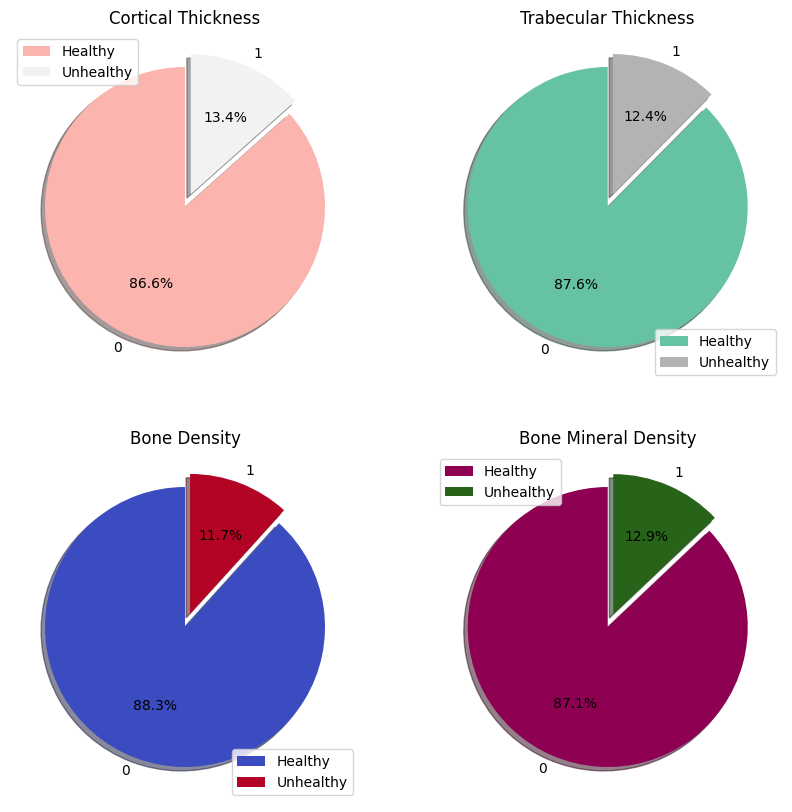

In [12]:
# setup the figure and axes of 2 rows and 2 column
fig, ax = plt.subplots(2, 2, figsize = (10, 10));

# initiate the explode list for dynamic effects in a pie chart
explode = [0.0, 0.1]

# inititate a label list
labels = ['Healthy', 'Unhealthy']

# Generate different colormaps for each pie chart
colors1 = plt.get_cmap('Pastel1')(np.linspace(0, 1, len(labels)))
colors2 = plt.get_cmap('Set2')(np.linspace(0, 1, len(labels)))
colors3 = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(labels)))
colors4 = plt.get_cmap('PiYG')(np.linspace(0, 1, len(labels)))

# create pie chart 1
ax[0, 0].pie(data_df.groupby('Health_Status')['Cortical_Thickness'].sum(), labels = data_df['Health_Status'].unique(), autopct = '%1.1f%%', startangle = 90, shadow = True,
             explode = explode, colors = colors1);
ax[0, 0].set_title('Cortical Thickness');
ax[0, 0].legend(labels);

# create pie chart 2
ax[0, 1].pie(data_df.groupby('Health_Status')['Trabecular_Thickness'].sum(), labels = data_df['Health_Status'].unique(), autopct = '%1.1f%%', startangle = 90, shadow = True,
             explode = explode, colors = colors2);
ax[0, 1].set_title('Trabecular Thickness');
ax[0, 1].legend(labels);

# create pie chart 3
ax[1, 0].pie(data_df.groupby('Health_Status')['Bone_Density'].sum(), labels = data_df['Health_Status'].unique(), autopct = '%1.1f%%', startangle = 90, shadow = True,
             explode = explode, colors = colors3);
ax[1, 0].set_title('Bone Density');
ax[1, 0].legend(labels);

# create pie chart 4
ax[1, 1].pie(data_df.groupby('Health_Status')['Bone_Mineral_Density'].sum(), labels = data_df['Health_Status'].unique(), autopct = '%1.1f%%', startangle = 90, shadow = True,
             explode = explode, colors = colors4);
ax[1, 1].set_title('Bone Mineral Density');
ax[1, 1].legend(labels);

From the pie chart above, we can see that the all 4 features have a `Healthy` Bone of 86-88% while, on the other hand, a 11-13% of `Unhealthy` bone status. This means that our data mostly consists of labels (`Health_Status`) of 0 instead of 1 for each feature parameter.

Now that we have visualized our data in various different forms of graphs/charts, let's move into the data pre-processing part to get our data into a proper structure and format to be implemented into our deep learning models.

## 3.0 Data Pre-processing ⚙️🛠️

"Data preprocessing is a important step in the data science transforming raw data into a clean structured format for analysis. It involves tasks like handling missing values, normalizing data and encoding variables. Mastering preprocessing in Python ensures reliable insights for accurate predictions and effective decision-making. Pre-processing refers to the transformations applied to data before feeding it to the algorithm."

Data preprocessing is an integral part of building deep learning models. It is a fundamental element to ensuring your model is trained in with no data leakage, outliers, overfitting/underfitting results, etc. This can be avoided by making the neccessary adjustments which are:

1. Drop the future features (future cortical thickness, future trabecular thickness, future bone density, future bone mineral density).
2. Split the data into train and test. (70% for train and 30% for test).
3. Normalization of the data. (Converting it into 1 and 0s).


**Resource**
1. Data Preprocessing - https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/
2. Nomalization - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#standardscaler
3. Splitting data - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#train-test-split


In [13]:
# drop the future features
preprocessed_data = data_df.drop(['Future_Cortical_Thickness', 'Future_Trabecular_Thickness', 'Future_Bone_Density', 'Future_Bone_Mineral_Density'], axis = 1)
preprocessed_data

,Cortical_Thickness,Trabecular_Thickness,Bone_Density,Bone_Mineral_Density,Health_Status
0,2.580915,0.129765,0.999632,0.778792,0
1,2.053111,0.234051,1.460571,1.107627,0
2,2.479638,0.160924,1.285595,0.647377,0
3,2.095290,0.183279,1.178927,0.753439,0
4,2.973794,0.243434,0.824815,0.426686,0
...,...,...,...,...,...
99996,1.576611,0.114295,1.323402,0.801938,0
99997,2.959248,0.311223,1.239563,1.111162,1
99998,1.004680,0.147116,1.099558,0.652571,0
99999,1.847764,0.128653,1.011927,0.441528,0


In [18]:
# split the data into train and test (70%) and (30%)
from sklearn.model_selection import train_test_split

# split the feature and the label by assigning the features to x and the label (health status) to y
X = preprocessed_data.drop('Health_Status', axis = 1)
y = preprocessed_data['Health_Status']

# assign train and test for both feature (x) and label (y) with the train and test size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True) # this is the have our training data and test data with test size of 30% and train size of 70%

# check the lengths of the training and testing data
len(X_train), len(y_train), len(X_test), len(y_test)

(70000, 70000, 30001, 30001)

As you can see we have 70,000 for our training data and 30,000 for our test data. Now let's normalize our training data.

In [20]:
# import the neccessary library
from sklearn.preprocessing import StandardScaler

# inititate the standard scalar
scalar = StandardScaler()

# use the scalar function
X_train_scaled = scalar.fit_transform(X_train) # fit and transform on the training feature data
X_test_scaled = scalar.transform(X_test)  # only transform the feature test data, NO FITTING

# view the scaled data
X_train_scaled, X_test_scaled

(array([[ 0.48000324,  1.28867843, -1.5017303 ,  0.84927768],
        [-1.22114035,  1.56431309,  0.80129485, -0.75927253],
        [-0.35153797,  0.42997701,  1.33722051, -0.62749405],
        ...,
        [-1.1891509 , -0.52493952, -1.54242046, -0.10850694],
        [ 0.72328603, -1.47053961,  0.95900108,  1.22124116],
        [ 1.21141498, -0.96949769, -1.00218045, -1.26196887]]),
 array([[-1.33535821, -1.33352992,  0.97777643, -1.30340044],
        [-1.73238495,  0.18819211,  0.55406724,  1.12268799],
        [ 0.51010735, -1.39907182,  0.4975263 , -0.442357  ],
        ...,
        [-1.40875973, -0.8121216 , -0.69410153,  0.93556708],
        [-0.34553556, -0.83989105,  0.12252448, -0.42144579],
        [ 0.28332658,  1.7119157 ,  0.23819632,  0.07642799]]))

Awesome!!! NOW LET'S BUILD A DEEP LEARNING MODEL!!!

## 4.0 Building a Deep Learning Model 🤖

### 4.1 Deep Learning Model 1